In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

15.234910602179156 -24.929704153073544
67.1866543131328 -81.49026971074531
51.94001116878337 -112.31771854642868
88.54950570511016 -168.21379054169577
-73.99578820436368 -163.48512228274222
12.298814512946635 -30.190520438139515
67.18057838837527 -56.5933224073342
-32.81704258618368 36.4014307339022
-45.34133776996971 -150.06908087380913
42.22530139788904 -47.583190149094094
85.678489081338 140.3728443446866
-55.540234258058916 1.7001052054024512
-3.104565556469751 154.85170360412502
80.45072290383706 -118.5682288801391
-7.646821351493614 40.784829698434066
56.55610092478156 39.54024210235613
14.005692058198377 -83.39258324800872
84.0392037150718 -68.05496840884719
-70.06019823117256 -173.61039518292066
58.14113857945813 51.394559047809764
-81.50141160514562 -10.228709239539086
-38.944705645589615 27.510299101473947
-31.26630517094305 -10.761325546262015
-72.68888863367658 -25.146333371337136
-37.80062347310899 82.07525984435796
-41.39449141654879 46.23839257958403
-76.89312669312002 1

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


638

In [7]:
print(cities)

['sao filipe', 'clyde river', 'hanna', 'barrow', 'mataura', 'sisimiut', 'richards bay', 'torbay', 'nizhneyansk', 'cape town', 'namatanai', 'norman wells', 'kilindoni', 'yuryev-polskiy', 'puerto cabezas', 'qaanaaq', 'vaini', 'kosino', 'port elizabeth', 'jamestown', 'ushuaia', 'bambous virieux', 'tsihombe', 'albany', 'barentsburg', 'vitim', 'east london', 'new norfolk', 'nikolskoye', 'noumea', 'khatanga', 'oxford', 'arraial do cabo', 'mackenzie', 'garowe', 'victoria point', 'mys shmidta', 'punta arenas', 'cap malheureux', 'sola', 'hithadhoo', 'xuanwu', 'esperance', 'belushya guba', 'saleaula', 'tuktoyaktuk', 'willmar', 'hasaki', 'rikitea', 'hobart', 'puerto ayora', 'illoqqortoormiut', 'mrirt', 'mandalgovi', 'kapaa', 'busselton', 'dabhol', 'russell', 'trairi', 'praia da vitoria', 'mahebourg', 'tura', 'bethel', 'kirakira', 'maumere', 'carnarvon', 'tidore', 'faanui', 'nhulunbuy', 'quatre cocos', 'wahran', 'mancora', 'tire', 'coahuayana', 'bredasdorp', 'longyearbyen', 'atuona', 'los llanos d

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao filipe
Processing Record 2 of Set 1 | clyde river
Processing Record 3 of Set 1 | hanna
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | sisimiut
Processing Record 7 of Set 1 | richards bay
Processing Record 8 of Set 1 | torbay
Processing Record 9 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | namatanai
Processing Record 12 of Set 1 | norman wells
Processing Record 13 of Set 1 | kilindoni
Processing Record 14 of Set 1 | yuryev-polskiy
Processing Record 15 of Set 1 | puerto cabezas
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | kosino
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | bambo

Processing Record 35 of Set 4 | saskylakh
Processing Record 36 of Set 4 | lambarene
Processing Record 37 of Set 4 | port hardy
Processing Record 38 of Set 4 | kahului
Processing Record 39 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 40 of Set 4 | ettlingen
Processing Record 41 of Set 4 | pevek
Processing Record 42 of Set 4 | aswan
Processing Record 43 of Set 4 | khasan
Processing Record 44 of Set 4 | balkanabat
Processing Record 45 of Set 4 | kavieng
Processing Record 46 of Set 4 | lappeenranta
Processing Record 47 of Set 4 | samarai
Processing Record 48 of Set 4 | mogadishu
Processing Record 49 of Set 4 | yenagoa
Processing Record 50 of Set 4 | komsomolskiy
Processing Record 1 of Set 5 | hambantota
Processing Record 2 of Set 5 | novikovo
Processing Record 3 of Set 5 | ust-nera
Processing Record 4 of Set 5 | bengkulu
Processing Record 5 of Set 5 | saltpond
Processing Record 6 of Set 5 | zhangye
Processing Record 7 of Set 5 | saldanha
Processing Record 8 of Set 

Processing Record 25 of Set 8 | bombay
Processing Record 26 of Set 8 | dunedin
Processing Record 27 of Set 8 | piacabucu
Processing Record 28 of Set 8 | tromso
Processing Record 29 of Set 8 | oktyabrskoye
Processing Record 30 of Set 8 | monte alegre
Processing Record 31 of Set 8 | kurchum
Processing Record 32 of Set 8 | nemuro
Processing Record 33 of Set 8 | nguiu
City not found. Skipping...
Processing Record 34 of Set 8 | havelock
Processing Record 35 of Set 8 | mehamn
Processing Record 36 of Set 8 | lolua
City not found. Skipping...
Processing Record 37 of Set 8 | iqaluit
Processing Record 38 of Set 8 | jamsa
Processing Record 39 of Set 8 | cidreira
Processing Record 40 of Set 8 | qandala
Processing Record 41 of Set 8 | casa grande
Processing Record 42 of Set 8 | kantang
Processing Record 43 of Set 8 | khor
Processing Record 44 of Set 8 | presidencia roque saenz pena
Processing Record 45 of Set 8 | lovozero
Processing Record 46 of Set 8 | sabzevar
Processing Record 47 of Set 8 | sao 

Processing Record 14 of Set 12 | moose factory
Processing Record 15 of Set 12 | reynoldsburg
Processing Record 16 of Set 12 | bonfim
Processing Record 17 of Set 12 | carandai
Processing Record 18 of Set 12 | henderson
Processing Record 19 of Set 12 | sechura
Processing Record 20 of Set 12 | necochea
Processing Record 21 of Set 12 | zhanaozen
Processing Record 22 of Set 12 | belmonte
Processing Record 23 of Set 12 | port alberni
Processing Record 24 of Set 12 | san cristobal
Processing Record 25 of Set 12 | kondopoga
Processing Record 26 of Set 12 | jos
Processing Record 27 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 28 of Set 12 | kawalu
Processing Record 29 of Set 12 | yulara
Processing Record 30 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 31 of Set 12 | victor harbor
Processing Record 32 of Set 12 | mikhaylovskoye
Processing Record 33 of Set 12 | atambua
Processing Record 34 of Set 12 | bafq
Processing Record 35 of Set 12 | moron
Proce

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sao Filipe,14.8961,-24.4956,77.27,79,98,7.40,CV,2022-07-31 04:59:44
1,Clyde River,70.4692,-68.5914,35.83,100,100,11.50,CA,2022-07-31 04:59:44
2,Hanna,51.6334,-111.9018,62.85,88,84,4.72,CA,2022-07-31 04:59:45
3,Barrow,71.2906,-156.7887,35.62,87,100,10.36,US,2022-07-31 04:57:53
4,Mataura,-46.1927,168.8643,48.47,93,99,6.33,NZ,2022-07-31 04:56:24
5,Sisimiut,66.9395,-53.6735,44.64,85,67,1.97,GL,2022-07-31 04:59:45
6,Richards Bay,-28.7830,32.0377,63.10,85,53,4.88,ZA,2022-07-31 04:59:46
7,Torbay,47.6666,-52.7314,65.57,88,100,16.11,CA,2022-07-31 04:59:46
8,Cape Town,-33.9258,18.4232,48.11,92,20,1.14,ZA,2022-07-31 04:59:47
9,Namatanai,-3.6667,152.4333,83.95,69,78,10.27,PG,2022-07-31 04:59:47


In [14]:
new_column_order = ["City","Country", "Date", "Lat", "Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [15]:
city_data_df= city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Filipe,CV,2022-07-31 04:59:44,14.8961,-24.4956,77.27,79,98,7.40
1,Clyde River,CA,2022-07-31 04:59:44,70.4692,-68.5914,35.83,100,100,11.50
2,Hanna,CA,2022-07-31 04:59:45,51.6334,-111.9018,62.85,88,84,4.72
3,Barrow,US,2022-07-31 04:57:53,71.2906,-156.7887,35.62,87,100,10.36
4,Mataura,NZ,2022-07-31 04:56:24,-46.1927,168.8643,48.47,93,99,6.33
5,Sisimiut,GL,2022-07-31 04:59:45,66.9395,-53.6735,44.64,85,67,1.97
6,Richards Bay,ZA,2022-07-31 04:59:46,-28.7830,32.0377,63.10,85,53,4.88
7,Torbay,CA,2022-07-31 04:59:46,47.6666,-52.7314,65.57,88,100,16.11
8,Cape Town,ZA,2022-07-31 04:59:47,-33.9258,18.4232,48.11,92,20,1.14
9,Namatanai,PG,2022-07-31 04:59:47,-3.6667,152.4333,83.95,69,78,10.27


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

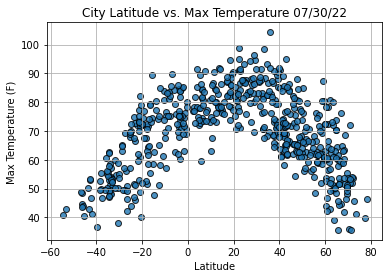

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

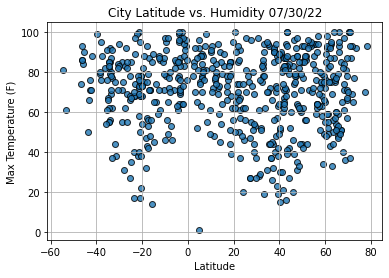

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

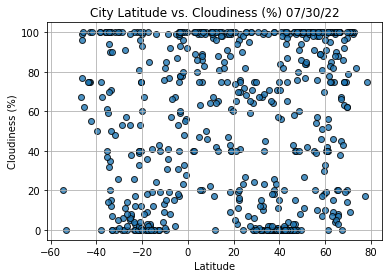

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

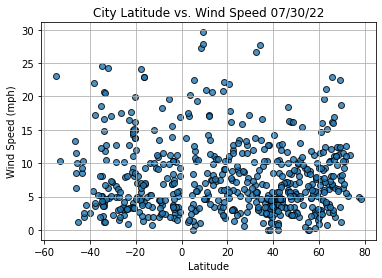

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
index13 = city_data_df.loc[13]
index13

City               Puerto Cabezas
Country                        NI
Date          2022-07-31 04:59:49
Lat                       14.0351
Lng                      -83.3888
Max Temp                     77.9
Humidity                       90
Cloudiness                    100
Wind Speed                   11.1
Name: 13, dtype: object

In [27]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4      False
       ...  
579     True
580     True
581     True
582     True
583     True
Name: Lat, Length: 584, dtype: bool

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Filipe,CV,2022-07-31 04:59:44,14.8961,-24.4956,77.27,79,98,7.40
1,Clyde River,CA,2022-07-31 04:59:44,70.4692,-68.5914,35.83,100,100,11.50
2,Hanna,CA,2022-07-31 04:59:45,51.6334,-111.9018,62.85,88,84,4.72
3,Barrow,US,2022-07-31 04:57:53,71.2906,-156.7887,35.62,87,100,10.36
5,Sisimiut,GL,2022-07-31 04:59:45,66.9395,-53.6735,44.64,85,67,1.97


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

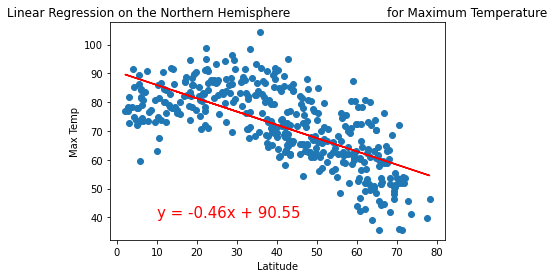

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

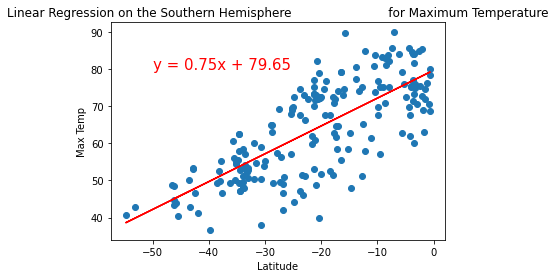

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

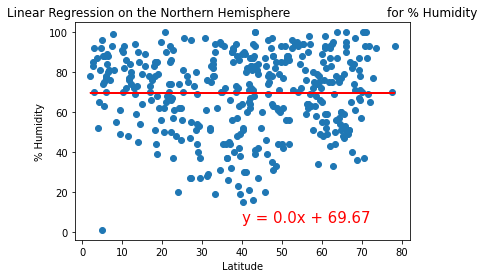

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,5))

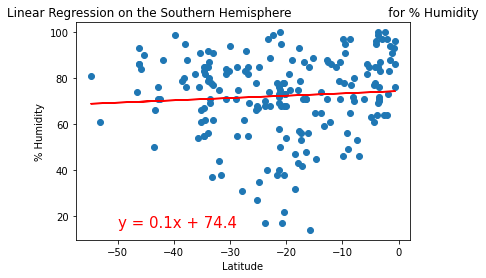

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

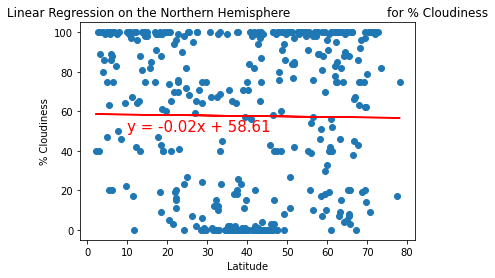

The r-value is: -0.012


In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,50))

(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
print(f"The r-value is: {r_value:.3f}")

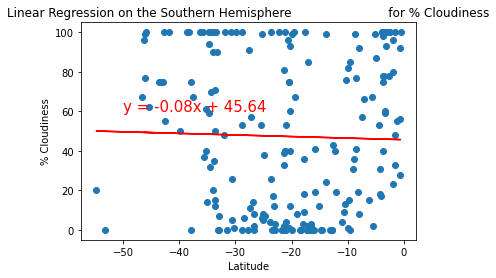

The r-value is: -0.027


In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
print(f"The r-value is: {r_value:.3f}")

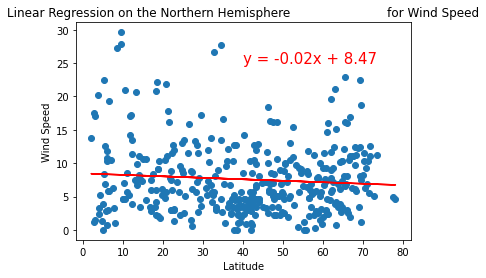

The r-value is: -0.082


In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
print(f"The r-value is: {r_value:.3f}")

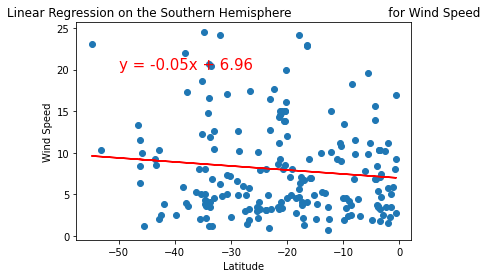

The r-value is: -0.111


In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))

(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
print(f"The r-value is: {r_value:.3f}")